# [Программирование на Python (SCS)](https://compscicenter.ru/courses/python/2015-autumn/classes/)
# Слайды  и видeо доступны по состоянию на август 2019 г.!

### Лектор Сергей Лебедев. Дата проведения лекции - сентябрь 2015

# 3. Декораторы и модуль functools

**Декоратор** - функция, которая принимает другую функцию и что-то возвращает
```
>>> @trace
... def foo(x):
... return 42
...
```
• Аналогичная по смыслу версия без синтаксического сахара:
```
>>> def foo(x):
... return 42
...
>>> foo = trace(foo)
```

• Теперь понятно, что по имени foo будет доступно то, что
вернула функция trace. Это и есть результат применения
декоратора.

• Возвращаемый объект может быть любого типа.

Слайд 2. @trace

• Декоратор trace выводит на экран сообщение с информацией о вызове декорируемой функции. Он подменяет декорируемую функцию на свою - 'inner', которая, в свою очередь, делает махинации (выводит имя и аргументы) и вызывает декорируемую функцию

In [2]:
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)
        return func(*args, **kwargs)
    return inner

In [4]:
# • Применим его к тождественной функции
@trace
def identity(x):
    "I do nothing useful."
    return x
identity(42)

identity (42,) {}


42


Далее в лекции будут рассмотрены:

• Возможность глобально отключать trace без лишних
телодвижений. <br>
• Явное указание файла при использовании `trace`<br>
    ```
    @trace(sys.stderr)
... def identity(x):
... return x
```<br>
• Использование sys.stdout для вывода по умолчанию.

In [5]:
# • Проблема1. Декорируемая функция потеряла атрибуты help и др.
# Решим эту проблему дальше
help(identity)

Help on function inner in module __main__:

inner(*args, **kwargs)



• Также реализуем возможность глобально отключать `trace` без лишних телодвижений 

• Реализуем явное указание файла, куда будем выводить сообщения при использовании `trace`

```>>> @trace(sys.stderr)
... def identity(x):
... return x```

* по умолачиню используем sys.out

# Слайд 4. Декораторы и help: проблема

In [8]:
def identity(x):
    "I do nothing useful."
    return x
identity.__name__, identity.__doc__

('identity', 'I do nothing useful.')

In [9]:
identity = trace(identity)
identity.__name__, identity.__doc__

('inner', None)

**__module__**
У любой функции в Python есть атрибут __module__,
содержащий имя модуля, в котором функция была определена.
Для функций, определённых в интерпретаторе, например:

In [10]:
identity.__module__

'__main__'

In [3]:
# Решение в лоб
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)
        return func(*args, **kwargs)
    inner.__module__ = func.__module__
    inner.__name__ = func.__name__
    inner.__doc__ = func.__doc__
    return inner
@trace
def identity(x):
    "I do nothing useful"
    return x
identity.__name__, identity.__doc__

('identity', 'I do nothing useful')

# Слайд 6. Модуль functools

In [72]:
import functools

# функция, реализующая логику копирования:
def trace(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)
        return func(*args, **kwargs)
    functools.update_wrapper(inner, func)
    return inner
@trace
def identity(x):
    "I do nothing useful"
    return x

In [78]:
identity(34)

identity (34,) {}
Evaluation: 4.0531158447265625e-06


34

In [76]:
import functools
import time

# В бок от темы. Декоратор для измерения времени выполнения ф-ии
def stopwatch(func):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)
        start = time.time()
        result =  func(*args, **kwargs)
        print(f"Evaluation: {time.time() - start}")
        return result
    functools.update_wrapper(inner, func)
    
    return inner
@stopwatch
def identity(x):
    "I do nothing useful"
    return x

In [77]:
identity(33)


identity (33,) {}
Evaluation: 4.76837158203125e-06


33

In [15]:
# либо тоже самое с помощью декоратора 'wraps'
def trace(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)
        return func(*args, **kwargs)
    return inner

# Cлайд 7. Управление поведением trace
Заведём глобальную переменную `trace_enabled` и с её
помощью будем отключать и включать `trace`.

Если `trace` **выключен**, то результатом применения
декоратора является сама функция func — никаких
дополнительных действий в момент её исполнения
производиться не будет.

In [17]:
trace_enabled = False
def trace(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs)
        return func(*args, **kwargs)
    return inner if trace_enabled else func

# Слайд 8. Декораторы с аргументами: синтаксис
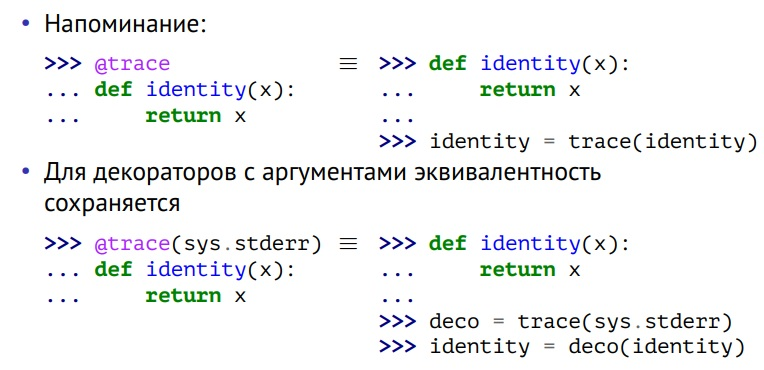
# Реализация:

In [20]:
def trace(handle):
    def decorator(func):
        @functools.wraps(func)
        def inner(*args, **kwargs):
            print(func.__name__, args, kwargs, file=handle)
            return func(*args, **kwargs)
        return inner
    return decorator

# Слайд 10. Декораторы с аргументами: @with_arguments

На предыдущем слайде тройная вложенность декораторов нечитабельна. Подобные проблемы в Python часто решаются с помощью декораторов. Рассмотрим решение на примере декоратора `with_arguments`

Можно обобщить логику декоратора с аргументами в виде
декоратора `with_arguments`. Это декоратор **для** декоратора, поэтому он принимает **декоратор**! Что происходит:
1. with_arguments принимает декоратор deco,
2. заворачивает его во wrapper, так как deco — декоратор с
аргументами, а затем в decorator.
3. decorator конструирует новый декоратор с помощью deco
и копирует в него внутренние атрибуты функции func.

Здесь все настолько сложно, что нет смысла в этом разбираться :)


In [87]:
import sys

def with_arguments(deco):
    @functools.wraps(deco)
    def wrapper(*dargs, **dkwargs):
        def decorator(func):
            result = deco(func, *dargs, **dkwargs)
            functools.update_wrapper(result, func)
            return result
        return decorator
    return wrapper

@with_arguments
def trace(func, handle):
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs, file=handle)
        return func(*args, **kwargs)
    return inner
    
@trace(sys.stderr)
def identity(x):
    return x

In [88]:
identity(45)

identity (45,) {}


45

# Слайд 14. Опциональные аргументы: магическая версия

Декоратор объявляем с функцией и именнованным аргументом (обязательно именованным). Если декорировать будем без аргумента, то `func` будет **не** None, поэтому код выполнится как для обычного декоратора. 

Если же аргумент
будет передан, причём ключевой `handle = ...` то `func` = None, значит выполним код 'with braces' который возвращает анонимную функцию (лябмда=trace(func, handle)). Лябмда принимает функцию и передает декоратору (рекурсия) с аргументами функции и аргумента (обертка, которая принимает функцию и ключевой аргумент).

P.S. В питоне 2 нет только ключевых аргументов, поэтому такой трюк не проходит, и нужно писать трёхуровневые декораторы

In [8]:
import sys, functools

def trace(func=None, *, handle=sys.stdout):
#     with braces
    if func is None:
        return lambda func: trace(func, handle=handle)
    
#     wihtout braces
    @functools.wraps(func)
    def inner(*args, **kwargs):
        print(func.__name__, args, kwargs, file=handle)
        return func(*args, **kwargs)
    return inner

@trace(handle=sys.stderr)
def identity(x):
    return x

identity(23)

identity (23,) {}


23

In [97]:
@trace
def identity(x):
    return x
identity(23)

identity (23,) {}


23

# Cлайд 15. Декораторы: резюме
• Декоратор — способ модифицировать поведение функции,
сохраняя читаемость кода.

• Декораторы бывают:
    - без аргументов @trace <br>
    - с аргументами @trace(sys.stderr)<br>
    - с опциональными аргументами.
    

# Cлайд 16. Практика применения декораторов. 
## @timethis
- запускает функцию указанное количество раз и выводит минимальное время выполнения

In [3]:
import time, functools

def timethis(func=None, *, n_iter=100):
    if func is None:
        return lambda func: timethis(func, n_iter=n_iter)

    @functools.wraps(func)
    def inner(*args, **kwargs):
        print(func.__name__, end=" ... ")
        acc = float("inf")
        for i in range(n_iter):
            tick = time.perf_counter()
            result = func(*args, **kwargs)
            acc = min(acc, time.perf_counter() - tick)
        print(acc)
        return result
    return inner
    
result = timethis(sum)(range(10 ** 6))

# ps
# время i5 u8250 (ноут: 4 ядра 1.6 GHz - 2018г):        0,01336
# время AMD Phenom II x4 (4 ядра 3 GHz - 2009г):        0,05698 (в 4 раза медленней)

sum ... 0.05698316799998793


In [7]:
result

499999500000

# Слайд 17. @profiled
- профилирование для бедных. Выводит количество вызовов функции

In [5]:
def profiled(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        inner.ncalls += 1
        return func(*args, **kwargs)

    inner.ncalls = 0
    return inner

@profiled
def identity(x):
    return x




In [11]:
print(identity(42))
identity.ncalls

42


6

# Слайд 18. @once
- Запускает функцию один раз

In [ ]:
def once(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        if not inner.called:
            func(*args, **kwargs)
            inner.called = True
    inner.called = False
    return inner

@once
def initialize_settings():
    print("Settings initialized.")

print(initialize_settings())

initialize_settings()


In [33]:
# Модифицированный декоратор для функции, которые что-то возвращают
def once(func):
    @functools.wraps(func)
    def inner(*args, **kwargs):
        if not inner.called:
            inner.result = func(*args, **kwargs)
            inner.called = True
            return inner.result
        else:
            return inner.result
    inner.called = False
    inner.result = None
    return inner

@once
def initialize_settings():
    print("Settings initialized.")
    return 42

print(initialize_settings())

initialize_settings()

Settings initialized.
42


42

# Слайд 19. @memoized
• Мемоизация — сохранение результатов выполнения
функции для предотвращения избыточных вычислений.<br>
• Напишем декоратор для автоматической мемоизации
“любой” функции.

In [42]:
def memoized(func):
    cache = {}

    @functools.wraps(func)
    def inner(*args, **kwargs):
        key = args + kwargs
        
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    return inner

In [84]:
# Здесь ф-я аккерман декорируется, но есть рекурсивные вызовы. Каждый вызов 
# внутри функции будет искать ссылку функции по имени и находить декорируемый
# аккерман, поэтому все должно работать.
# Но не работает кеширование! - из-за того, что словарь kwargs нехешируемый обект
@memoized
def ackerman(m, n):
    if not m:
        return n + 1
    elif not n:
        return ackerman(m - 1, 1)
    else:
        return ackerman(m - 1, ackerman(m, n - 1))

In [44]:
ackerman(3, 4)

(3, 4, {})


TypeError: unhashable type: 'dict'

In [100]:
# Исправляем проблему нехешируемости словаря приведением kwargs к кортежу. 
# Сортировка - дополнительная мера, чтобы порядок именованных аргументов
# не влиял на результат.
def memoized(func):
    cache = {}

    @functools.wraps(func)
    def inner(*args, **kwargs):
        key = args + tuple(sorted(kwargs.items()))
        
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    return inner

# Теперь аккерман работает
@memoized
def ackerman(m, n):
    if not m:
        return n + 1
    elif not n:
        return ackerman(m - 1, 1)
    else:
        return ackerman(m - 1, ackerman(m, n - 1))
ackerman(3, 4)

125

In [103]:
a = {'str': 2, 3: 'mol'}

In [104]:
tuple((a.items()) ) in a

False

In [109]:
tuple(a.items()) == (a.items(),)


False

Приведенное решение (приведение словаря kwargs к кортежу) не универсальное, т.к. в случае передачи нехешируемых объектов в позиционных аргументах либо в значениях kwargs приведённый кортеж становится нехешируемый (некоторые его объекты нехешируемы) и всё ломается:

In [112]:
@memoized
def my_f(x):
    return x

In [114]:
# передаем хешируемый объект
my_f(4)

4

In [116]:
# Передаем нехешируемый объект - ошибка!
my_f([1, 2, 3])

TypeError: unhashable type: 'list'

Универсального решения для декоратора `memoized` **нет**!
Возможные доп. решения (хотя и наше неплохое):
Можно сериализовывать аргументы в строку, например, через str
или, что более осмысленно, через pickle

# Слайд 22. @deprecated


In [13]:
# Чего-то нет варнинга, поэтому пока используем простой 'warn'
# вместо warn_explicit (который более низкоуровневый и посзволяет вставлять код, номер строки и т.п.)
import warnings

def deprecated(func):
    code = func.__code__
#     warnings.warn_explicit(
#         func.__name__ + " is deprecated.",
#         category=DeprecationWarning,
#         filename=code.co_filename,
#         lineno=code.co_firstlineno + 1)
    warnings.warn(
        func.__name__ + " is deprecated.",
        category=DeprecationWarning,
    )
    return func

@deprecated
def identity(x):
    return x

identity(23)

d:\opencv\py_lecs\env\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: identity is deprecated.
  


23

# Слайд 23. Контракты pre и post
• Контрактное программирование — способ проектирования
программ, основывающийся на формальном описании
интерфейсов в терминах предусловий, постусловий и
инвариантов.

• В Python контрактное программирование можно
реализовать в виде библиотеки декораторов https://pypi.python.org/pypi/contracts:

In [136]:
# Проверяем чтобы в функцию расчета логарифма не передали отрицательное число
@pre(lambda x: x >= 0, "negative argument")
def checked_log(x):
    pass

is_not_nan = post(lambda r: not math.isnan(r), "not a number")

# Проверяем чтобы результат нашей мегафункции не был NaN
@is_not_nan
def somethind_useful():
    pass

13

In [152]:
# РЕАЛИЗАЦИЯ PRE:
def pre(cond, message):
    def wrapper(func):
        @functools.wraps(func)
        def inner(*args, **kwargs):
            assert cond(*args, **kwargs), message
            return func(*args, **kwargs)
        return inner
    return wrapper

@pre(lambda x: x >= 0, 'negative argument')
def checked_log(x):
    return math.log(x)

checked_log(-42)


AssertionError: negative argument

In [161]:
import math

# РЕАЛИЗАЦИЯ POST:
def post(cond, message):
    def wrapper(func):
        @functools.wraps(func)
        def inner(*args, **kwargs):
            result =  func(*args, **kwargs)
            assert cond(result), message
            return result
        return inner
    return wrapper

@post(lambda x: not math.isnan(x), 'not a number')
def something_useful():
    return float("nan")

something_useful()


AssertionError: not a number

# Слайд 26. Цепочки декораторов
• Синтаксис Python разрешает одновременное применение
нескольких декораторов.

• Порядок декораторов имеет значение:

In [166]:
def square(func):
    return lambda x: func(x * x)

def addsome(func):
    return lambda x: func(x + 42)

@square
@addsome
def identity(x):
    return x

identity(2)

46

In [168]:
@addsome
@square
def identity(x):
    return x

identity(2)

1936

Такая зависимость от результата неочевидна, поэтому если надо разобраться что 
происходит запишем эквивалент применения декораторов:
identity = square(addsome(identity)): (Для 1-го порадка декораторов: 
square->addsome)
- т.е. сначала вызывается square, затем addsome:

In [177]:
def identity(x):
    return x

identity = square(addsome(identity))
identity(2)

46

# Слайд 27. Практика использования декораторов: резюме
• Декораторы в мире Python вездесущи и полезны.<br>
• Больше примеров можно найти по ссылке (https://wiki.python.org/moin/PythonDecoratorLibrary) и практически
в любой библиотеке на Python.
# Слайд 28. Модуль functools: lru_cache
functools - модуль для любителей функционального программирования.

**lru_cache** - Родственник уже рассмотренного memoized, сохраняющий
фиксированное количество последних вызовов. Остальные вызовы выбрасываются.


In [2]:
import functools

@functools.lru_cache(maxsize=64)
def ackerman(m, n):
    if not m:
        return n + 1
    elif not n:
        return ackerman(m - 1, 1)
    else:
        return ackerman(m - 1, ackerman(m, n - 1))
    
ackerman(3, 4)


125

In [4]:
ackerman.cache_info()

CacheInfo(hits=65, misses=315, maxsize=64, currsize=64)

• Можно не ограничивать количество сохраняемых вызовов, указав maxsize=None -
тогда мы получим в точности поведение memoized. По умолчанию maxsize=128, а не None. Это сделано во избежание `memory leak`, Т.к. в случае None и бесконечной работы программы в конце концов случится `out of memory`:
```
@functools.lru_cache(maxsize=None)
def ackerman(m, n):
...
```

In [6]:
@functools.lru_cache(maxsize=64)
def identity(x):
    return x

identity(2)

2

In [15]:
# lru_cache как и мемойзед не работает с нехешируемыми данными:
identity([3,3])

TypeError: unhashable type: 'list'

In [18]:
identity.cache_info()


CacheInfo(hits=5, misses=2, maxsize=64, currsize=2)

# Слайд 29. partial
• С помощью функции partial можно зафиксировать часть
позиционных и ключевых аргументов в функции.

• Выполнившие домашнее задание узнают в partial
расширение функции curry.

In [19]:
f = functools.partial(sorted, key=lambda p: p[1])
f([("a", 4), ("b", 2)])

[('b', 2), ('a', 4)]

In [20]:
g = functools.partial(sorted, [2, 3, 1, 4])
g()

[1, 2, 3, 4]

In [27]:
# Функция пребразует строки, записанные в двоичном формате в целое число
ff = functools.partial(int, base=2)
ff('101011')

43

# Слайд 30. Обобщённые (мультиметоды) функции
Функция len называется обобщённой, так как её
реализация может быть специализирована для
конкретного типа
```
>>> len([1, 2, 3, 4])
4
>>> len({1, 2, 3, 4})
4
>>> len(range(4))
4
• Примеры обобщённых функций в Python:
>>> str([1, 2, 3, 4])
'[1, 2, 3, 4]'
>>> hash((1, 2, 3, 4))
485696759010151909
>>> sum([[1], [2]], [])
[1, 2]
• Как реализовать свою обобщённую функцию?
```

# Слайд 30. singledispatch 
- декоратора, который позволяет писать функции, которые по-разному работают, в зависимости от передаваемых аргументов.
Для примера напишем функцию, которая упаковывает переданное её значение в бинарную строку (серилизует).


In [28]:
# Базовая ф-ия для случаев, если остальные не подошли
# Вызываем assert и пишем "неподходящий тип"
@functools.singledispatch
def pack(obj): 
    type_name = type(obj).__name__
    assert False, "Unsupported type: " + type_name
    
#  Далее перечисляем особые случаи - для каждого типа своя ф-ия:
@pack.register(int)
def _(obj):
    return b"I" + hex(obj).encode("ascii")

@pack.register(list)
def _(obj):
    return b"L" + b",".join(map(pack, obj))

pack([1, 2, 4])

b'LI0x1,I0x2,I0x4'

In [29]:
# При передаче неподдерживаего типа - ошибка
pack(42.)

AssertionError: Unsupported type: float

# Слайд 32. Свёртка, мотивация для reduce

In [33]:
# Функцию суммирования
sum([1, 2, 3, 4])
# можно записать скобочками:
(((0 + 1) + 2) + 3) + 4

10

In [35]:
# Что если мы захотим использовать другую бинарную 
# операцию, например, умножение?
(((1 * 1) * 2) * 3) * 4

24

In [71]:
# То, что знак + может быть легко заменён другой операцией без изменения
# порядка вычеслений, называется `левой свёрткой` = reduce:
functools.reduce(lambda acc, x: acc + x, [1, 2, 3, 4])

10

# примеры применения reduce:
Функция reduce принимает три аргумента: бинарную
функцию и последовательность.

• Вычисление reduce(op, xs) можно схематично
представить как:
```
op(op(op(op(xs[0]), xs[1]), xs[2]), ...)
op(op(op(xs[0], xs[1]), xs[2]), ...)```

In [18]:
functools.reduce(lambda acc, s: 10*acc + int(s), [1, 13])

23

In [17]:
# Преобразование строки с числом в инт (извращенный эквивалент int("1912"))
#      acc  +  s  =  result
# 1.    0      1       1
# 1.  1*10     9       19
# 1.  19*10    1       191
# 1.  191*10   2       1912

functools.reduce(lambda acc, s: 10*int(acc) + int(s), "1912")

1912

In [82]:
# ф-я merge, которая сливает два сортиррованных списка
def merge(list1, list2):
    return sorted(list1 + list2)

# можно обобщить на произвольное количество списков
functools.reduce(merge, [[1, 2, 7], [5, 6], [0]])

[0, 1, 2, 5, 6, 7]

# reduce: резюме
• Несмотря на свою популярность в функциональных
языках, в Python довольно сложно придумать полезный
пример использования reduce.

• Резюме про reduce:
- работает с любым объектом, поддерживающим протокол
итератора;
- работает слева направо;
- использует первый элемент последовательности, если
начальное значение не указано явно.

# functools: резюме
• Модуль functools украшает будни любителя
функционального программирования.

• Мы поговорили про:
- lru_cache
- partial
- singledispatch
- reduce